# Music

In [49]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [50]:
from fastai.text import *

In [3]:
import music21
from music21 import *
from IPython.display import Image, Audio

In [26]:
from encode_data import *

In [4]:
path = Path('data/midi/midi_transcribe_v1_simple/')
path.ls()[:5]

[PosixPath('data/midi/midi_transcribe_v1_simple/ecomp'),
 PosixPath('data/midi/midi_transcribe_v1_simple/classic_piano'),
 PosixPath('data/midi/midi_transcribe_v1_simple/cprato'),
 PosixPath('data/midi/midi_transcribe_v1_simple/tmp_pop'),
 PosixPath('data/midi/midi_transcribe_v1_simple/tmp')]

In [5]:
model_path = 'tmp_clc_overnight_ep20'

https://hpml2018.github.io/HPML2018_1.pdf

This paper suggests linear scaling rule does not work with RNNs. 3e-3 seems to be the magical number for 2k-8k

However, they didn't use schedule warmup, so I doubt they optimized the learning rate enough

In [6]:
bs=256
bptt=250

In [7]:
from fastai_data import *

data = TextLMDataBunch.load(path, cache_name='tmp_clc', bs=bs, bptt=bptt)
data.valid_ds.x.processor[0] = TokenizeProcessor(tokenizer=MusicTokenizer())
t = data.train_ds[0][0]
t.text[:50], t.data

('xxbos nG2 t1 nB-5 t1 || nG2 t2 nG5 t1 nB-5 t2 || n',
 array([ 2, 47,  9, 32, ..., 10, 47,  8, 10]))

### Load Learner

In [8]:
learn = language_model_learner(data, drop_mult=1, clip=.2, bptt=bptt)
learn = learn.load(model_path)

## Done

In [36]:
out = learn.pred_batch()

In [37]:
learn.show_results(rows=5, max_len=25)

text,target,pred
nF#5 t2 nG#5 t2 nB-5 t2 nC#6 t2 nF#6 t1 nB6 t2 nC#7 t2 || nB2 t2 nE3 t2 nF#3 t2 nB3 t2 nE4 t2,t2 nA4 t2 nB4 t2 nC#5 t2 nE-5 t2 nE5 t2 nF#5 t2 nG#5 t2 nB-5 t2 nC#6 t2 nF#6 t1 nB6 t2 nC#7 t2,t2 nA4 t2 nB4 t2 nC#5 t2 nE-5 t2 nE5 t2 nF#5 t2 nG#5 t2 nB-5 t2 nC#6 t2 nF#6 t2 nB6 t2 nC#7 t2
nF#7 t2 || nG#2 t2 nE3 t2 nA3 t2 nE4 t2 nF#4 t1 nB4 t1 nC5 t2 nG#5 t2 nB5 t2 nC#6 t2 nG6 t2,t2 nB6 t2 nC#7 t2 nF#7 t2 nB7 t1 || nG#2 t2 nE3 t2 nA3 t2 nE4 t2 nC5 t2 nG#5 t2 nB5 t2 nC#6,t2 nC#7 t2 nC#7 t2 nF#7 t2 || t1 || nG#2 t2 nE3 t2 nA3 t2 nE4 t2 nF#4 t2 nG#5 t2 nB5 t2 nC#6
nF2 t1 nC#4 t2 nG#4 t2 nB-4 t2 || nF2 t2 nC#4 t2 nG#4 t2 nB-4 t2 || nF2 t2 nC3 t1 nC#4 t2 nG#4,nB-4 t2 || nC#4 t2 nG#4 t2 nB-4 t2 || nG#3 t1 nC#4 t2 nG#4 t2 nB-4 t2 || nC3 t1 nC4 t1 nC#4 t2,nB-4 t2 || nF2 t2 nG#4 t2 nB-4 t2 || nC#4 t1 nC#4 t2 nG#4 t2 nB-4 t2 || nG#3 t1 nC#4 t1 nC#4 t2
t2 nB1 t2 nF#2 t2 nG#2 t2 nF#3 t2 nB3 t2 nC4 t2 nC#4 t1 nE-4 t2 nF#4 t2 nG#4 t2 nA4 t2 nB-4 t2,t2 nD5 t2 nE5 t1 nF#5 t2 nG#5 t2 nA5 t2 nE6 t1 nG6 t2 nC7 t2 nC#7 t2 || nB-1 t2 nB1 t2 nF2,t2 nD5 t2 nF#5 t1 nF#5 t2 nG#5 t2 nA5 t2 nG6 t1 nG6 t2 nC7 t2 nC#7 t2 || nB-1 t2 nB1 t2 nF#2
nC6 t2 nC#6 t2 nE-6 t2 nF#6 t2 nG#6 t2 nA6 t2 nB6 t2 nC7 t2 || nB-1 t2 nB1 t2 nF#2 t2 nG#2 t2,t2 nF#3 t2 nB3 t2 nC4 t2 nC#4 t2 nF#4 t2 nA4 t2 nB-4 t2 nC5 t2 nC#5 t2 nF5 t2 nF#5 t2 nG#5 t2,t2 nF#3 t2 nB3 t2 nC4 t2 nC#4 t2 nF#4 t2 nA4 t2 nB-4 t2 nC5 t2 nC#5 t2 nF5 t2 nF#5 t2 nG#5 t2


In [38]:
idx = 20
seed_len = 200
files = get_files(path/'ecomp', recurse=True)
file = files[idx]; file

PosixPath('data/midi/midi_transcribe_v1_simple/ecomp/2017/TuanS04.txt')

In [39]:
with open(file, 'r') as f:
    txt_out = f.read()
notes = txt_out.split(' ')
seed = ' '.join(notes[:seed_len]); seed


'nC#6 t1 || nF#2 t1 || nF#2 t2 nC#6 t1 || nC#6 t2 || nC#6 t2 || nC#4 t1 nF#5 t1 nC#6 t2 || nC#6 t2 || nF#4 t1 nB-5 t1 || nF#4 t2 nB-4 t1 nC#5 t1 || nF#4 t1 nB-4 t2 nF#5 t1 || nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t2 nB-5 t1 || nF#3 t1 nC#4 t2 nF#4 t2 nB-4 t2 nF#5 t2 nC#6 t1 || nF#3 t2 nF#4 t2 nB-4 t2 nF#5 t1 nC#6 t2 || nF#3 t2 nF#4 t1 nB-4 t2 nC#5 t1 nF#5 t2 nB-5 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nC#5 t2 nB-5 t2 || nF#3 t1 nF#4 t2 nB-4 t2 nC#6 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t1 nC#6 t2 || nF#3 t2 nC#4 t2 nF#4 t1 nB-4 t2 nC#5 t1 nB-5 t1 nC#6 t2 || nF#3 t2 nC#4 t2 nF#4 t2 nB-4 t1 nF#5 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nB-5 t1 || nF#3 t1 nC#4 t2 nF#4 t2 nB-4 t2 nC#6 t1 || nF#3 t2 nF#4 t2 nB-4 t2 nF#5 t1 nB-5 t1 nC#6 t2 || nF#3 t2 nF#4 t1 nB-4 t2 nC#5 t1 || nF#3'

In [40]:
pred_out = learn.predict(seed, n_words=200); pred_out

'nC#6 t1 || nF#2 t1 || nF#2 t2 nC#6 t1 || nC#6 t2 || nC#6 t2 || nC#4 t1 nF#5 t1 nC#6 t2 || nC#6 t2 || nF#4 t1 nB-5 t1 || nF#4 t2 nB-4 t1 nC#5 t1 || nF#4 t1 nB-4 t2 nF#5 t1 || nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t2 nB-5 t1 || nF#3 t1 nC#4 t2 nF#4 t2 nB-4 t2 nF#5 t2 nC#6 t1 || nF#3 t2 nF#4 t2 nB-4 t2 nF#5 t1 nC#6 t2 || nF#3 t2 nF#4 t1 nB-4 t2 nC#5 t1 nF#5 t2 nB-5 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nC#5 t2 nB-5 t2 || nF#3 t1 nF#4 t2 nB-4 t2 nC#6 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t1 nC#6 t2 || nF#3 t2 nC#4 t2 nF#4 t1 nB-4 t2 nC#5 t1 nB-5 t1 nC#6 t2 || nF#3 t2 nC#4 t2 nF#4 t2 nB-4 t1 nF#5 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nB-5 t1 || nF#3 t1 nC#4 t2 nF#4 t2 nB-4 t2 nC#6 t1 || nF#3 t2 nF#4 t2 nB-4 t2 nF#5 t1 nB-5 t1 nC#6 t2 || nF#3 t2 nF#4 t1 nB-4 t2 nC#5 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t1 nF#6 t1 || nF#3 t1 nC#4 t2 nF#4 t2 nB-4 t2 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nC#7 t1 || nF#3 t2 nC#4 t2 nF#4 t1 nB-4 t2 nF#5 t1 nB-5 t1 || nF#3 t2 nF#4 t2 nB-4 t2 nF#5 t2 nG#5 t1 || nC2

In [ ]:
data.vocab.itos

### Beam search

In [145]:
cuda_enabled=True
def get_x_input(partial):
    _, _, _, seq = partial
    max_len = bptt-50
    input = seq[-max_len:]
    input_var = torch.LongTensor([input])
    if cuda_enabled:
        input_var = input_var.cuda()
    return input_var
#     return input_var.unsqueeze(dim=0)

# song = string
# seq_length = generated song length
# beam_size = what to choose from
def beam_search(seed, seq_length, beam_size, learn):    
    xb, yb = learn.data.one_item(seed)
    seed_list = xb.squeeze().tolist()
    learn.model.reset()
    partial_sequences = [(0, 0, [], seed_list)]
    
    for i in progress_bar(range(seq_length), leave=False):
        partial_sequences = find_partials(partial_sequences, beam_size, learn)
    final_sequence = partial_sequences[0][3] # 0 = highest prob, 3 = seq
    return learn.data.vocab.textify(final_sequence), final_sequence
    
def find_partials(partial_sequences, beam_size, learn, 
                  no_maj:bool=False, no_unk:bool=True, temperature:float=2, 
                  min_p:float=None, random=True):
    partial_next = []
    for partial in partial_sequences:
        it, tot_p, p_list, seq = partial
        x_input = get_x_input(partial)
        y = torch.zeros_like(x_input)
        
        predict_probs = learn.pred_batch(batch=(x_input,y)).squeeze()[-1]
        if no_unk: predict_probs[learn.data.vocab.stoi[UNK]] = 0.
        if no_maj: predict_probs[learn.data.vocab.stoi[TK_MAJ]] = 0.
        if min_p is not None: predict_probs[res < min_p] = 0.
        if temperature != 1.: predict_probs.pow_(1 / temperature)
            
            
        if random:
            idxs = torch.multinomial(predict_probs, beam_size)
            probs = predict_probs[idxs]
        else:
            # last_it_probs = torch.exp(predict_probs[-(it+1):]) # this is to predict the last few iterations
            last_it_probs = torch.exp(predict_probs)
            probs, idxs = torch.topk(last_it_probs, beam_size, 0)
        
#         reps = [(data.vocab.itos[i],p) for i,p in zip(idxs,probs) if i in [8, 9]]
#         if reps: print(reps)
            
        def calc_prob(probs):
#             return np.prod(-np.log(probs[-beam_size:]))
            return -np.prod(np.abs(np.log(probs[-(beam_size*4):])))
            
        for prob,idx in zip(probs,idxs):
            new_p_list = p_list+[prob.item()]
#             print(calc_prob(new_p_list))
            partial_next.append((it+1, calc_prob(new_p_list), new_p_list, seq+[idx.item()]))

    partial_sequences = sorted(partial_next, key=lambda x: x[1], reverse=True)[:beam_size]
    return partial_sequences

In [146]:
pred_beam, idxs = beam_search(seed, seq_length=200, beam_size=4, learn=learn)

In [147]:
pred_beam

'nC#6 t1 || nF#2 t1 || nF#2 t2 nC#6 t1 || nC#6 t2 || nC#6 t2 || nC#4 t1 nF#5 t1 nC#6 t2 || nC#6 t2 || nF#4 t1 nB-5 t1 || nF#4 t2 nB-4 t1 nC#5 t1 || nF#4 t1 nB-4 t2 nF#5 t1 || nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t2 nB-5 t1 || nF#3 t1 nC#4 t2 nF#4 t2 nB-4 t2 nF#5 t2 nC#6 t1 || nF#3 t2 nF#4 t2 nB-4 t2 nF#5 t1 nC#6 t2 || nF#3 t2 nF#4 t1 nB-4 t2 nC#5 t1 nF#5 t2 nB-5 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nC#5 t2 nB-5 t2 || nF#3 t1 nF#4 t2 nB-4 t2 nC#6 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t1 nC#6 t2 || nF#3 t2 nC#4 t2 nF#4 t1 nB-4 t2 nC#5 t1 nB-5 t1 nC#6 t2 || nF#3 t2 nC#4 t2 nF#4 t2 nB-4 t1 nF#5 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nB-5 t1 || nF#3 t1 nC#4 t2 nF#4 t2 nB-4 t2 nC#6 t1 || nF#3 t2 nF#4 t2 nB-4 t2 nF#5 t1 nB-5 t1 nC#6 t2 || nF#3 t2 nF#4 t1 nB-4 t2 nC#5 t1 || nF#3 t2 nE-4 t1 nF#4 t2 nB-4 t2 nF#5 t1 nB-5 t1 nE-6 t1 || nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t2 nB-5 t2 nE-6 t2 || nE-4 t1 nF#4 t2 nB-4 t2 nB-5 t2 nE-6 t2 || nC#4 t1 nF#4 t2 nG#4 t1 nB-4 t2 nC#5 t1 nG#5 t1 nB-5 t2 nC#6 t1 nE-6 t2 |

In [148]:
pred_beam_only = pred_beam.replace(seed, '').strip(); pred_beam_only

't2 nE-4 t1 nF#4 t2 nB-4 t2 nF#5 t1 nB-5 t1 nE-6 t1 || nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t2 nB-5 t2 nE-6 t2 || nE-4 t1 nF#4 t2 nB-4 t2 nB-5 t2 nE-6 t2 || nC#4 t1 nF#4 t2 nG#4 t1 nB-4 t2 nC#5 t1 nG#5 t1 nB-5 t2 nC#6 t1 nE-6 t2 || nG#3 t1 nF4 t1 nF#4 t2 nG#4 t2 nB-4 t2 nF5 t1 nB-5 t2 nC6 t1 nE-6 t2 nF6 t1 || nE-4 t1 nF#4 t2 nG#4 t2 nB-4 t2 nC5 t1 nE-5 t1 nG#5 t1 nB-5 t2 nG#6 t1 || nG#3 t1 nE-4 t2 nF#4 t2 nG#4 t2 nB-4 t2 nC5 t2 nE-5 t2 nG#5 t2 nB-5 t2 nG#6 t2 || nF3 t1 nA3 t1 nC4 t1 nE-4 t2 nF#4 t2 nG#4 t2 nB-4 t2 nC5 t2 nE-5 t2 nG#5 t2 nB-5 t2 nG#6 t2 || nC#3 t1 nC#4 t1 nE-4 t2 nF#4 t2 nG#4 t2 nB-4 t2 nC5 t2 nE-5 t2 nG#5 t2 nB-5 t2 nC#6 t1 nF#6 t1 nB-6 t1 || nF#3 t1 nG#3 t1 nE-4 t2 nF#4 t2 nG#4 t2 nB-4 t2 nC5 t2 nE-5 t2 nG#5 t2 nB-5 t2 nC#6 t2 nF#6 t2 nB-6 t2 || nF3 t1 nE-4'

In [151]:
note_stream = str2stream(pred_beam_only)

't'


In [152]:
note_stream.show('midi')

### Testing

In [41]:
seed

'nC#6 t1 || nF#2 t1 || nF#2 t2 nC#6 t1 || nC#6 t2 || nC#6 t2 || nC#4 t1 nF#5 t1 nC#6 t2 || nC#6 t2 || nF#4 t1 nB-5 t1 || nF#4 t2 nB-4 t1 nC#5 t1 || nF#4 t1 nB-4 t2 nF#5 t1 || nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t2 nB-5 t1 || nF#3 t1 nC#4 t2 nF#4 t2 nB-4 t2 nF#5 t2 nC#6 t1 || nF#3 t2 nF#4 t2 nB-4 t2 nF#5 t1 nC#6 t2 || nF#3 t2 nF#4 t1 nB-4 t2 nC#5 t1 nF#5 t2 nB-5 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nC#5 t2 nB-5 t2 || nF#3 t1 nF#4 t2 nB-4 t2 nC#6 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t1 nC#6 t2 || nF#3 t2 nC#4 t2 nF#4 t1 nB-4 t2 nC#5 t1 nB-5 t1 nC#6 t2 || nF#3 t2 nC#4 t2 nF#4 t2 nB-4 t1 nF#5 t1 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nB-5 t1 || nF#3 t1 nC#4 t2 nF#4 t2 nB-4 t2 nC#6 t1 || nF#3 t2 nF#4 t2 nB-4 t2 nF#5 t1 nB-5 t1 nC#6 t2 || nF#3 t2 nF#4 t1 nB-4 t2 nC#5 t1 || nF#3'

In [42]:
pred_only = pred_out.replace(seed, '').strip(); pred_only

't2 nC#4 t1 nF#4 t2 nB-4 t2 nF#5 t1 nF#6 t1 || nF#3 t1 nC#4 t2 nF#4 t2 nB-4 t2 || nF#3 t2 nC#4 t1 nF#4 t2 nB-4 t2 nC#7 t1 || nF#3 t2 nC#4 t2 nF#4 t1 nB-4 t2 nF#5 t1 nB-5 t1 || nF#3 t2 nF#4 t2 nB-4 t2 nF#5 t2 nG#5 t1 || nC2 t1 nF#4 t2 nB-4 t2 nG#5 t2 || nF#4 t2 nB-4 t1 nG#5 t2 || xxbos nB1 t1 nA2 t1 nB2 t1 nE3 t1 nE4 t1 || nB1 t2 nA2 t2 nB2 t2 nE3 t2 nE4 t2 || nB1 t2 nA2 t2 nG#4 t1 || nB1 t2 nA2 t2 nF#4 t1 nA4 t1 || nB1 t2 nA2 t2 nB3 t1 nG#4 t1 nB4 t1 || nB1 t2 nA2 t2 nB3 t2 nB4 t2 || nB1 t2 nA2 t2 nE4 t1 nB4 t1 || nB1 t2 nA2 t2 nB3 t1 nG#4 t1 nB4 t2 || nB1 t2 nA2 t2 nB3 t2 || nB1 t2 nA2 t2 nB3 t2 nE4 t1 || nB1 t2 nA2 t2 nB3 t1 nG#4 t1 || nB1 t2 nA2 t2 nF#4 t1 nG#4 t2 || nB1 t2 nA2 t1 nG#4 t2 nB4 t1 || nB1 t2 nA2 t2 nB3 t1'

### Generate from predictions

In [43]:
str2seq(pred_only)

[[C#4t1, F#4t2, B-4t2, F#5t1, F#6t1],
 [F#3t1, C#4t2, F#4t2, B-4t2],
 [F#3t2, C#4t1, F#4t2, B-4t2, C#7t1],
 [F#3t2, C#4t2, F#4t1, B-4t2, F#5t1, B-5t1],
 [F#3t2, F#4t2, B-4t2, F#5t2, G#5t1],
 [C2t1, F#4t2, B-4t2, G#5t2],
 [F#4t2, B-4t1, G#5t2],
 [B1t1, A2t1, B2t1, E3t1, E4t1],
 [B1t2, A2t2, B2t2, E3t2, E4t2],
 [B1t2, A2t2, G#4t1],
 [B1t2, A2t2, F#4t1, A4t1],
 [B1t2, A2t2, B3t1, G#4t1, B4t1],
 [B1t2, A2t2, B3t2, B4t2],
 [B1t2, A2t2, E4t1, B4t1],
 [B1t2, A2t2, B3t1, G#4t1, B4t2],
 [B1t2, A2t2, B3t2],
 [B1t2, A2t2, B3t2, E4t1],
 [B1t2, A2t2, B3t1, G#4t1],
 [B1t2, A2t2, F#4t1, G#4t2],
 [B1t2, A2t1, G#4t2, B4t1],
 [B1t2, A2t2, B3t1]]

In [44]:
note_stream = str2stream(pred_out)

In [45]:
note_stream.show('text')

{0.0} <music21.stream.Part 0x7f989c3024e0>
    {0.0} <music21.instrument.Piano Piano>
    {0.0} <music21.tempo.MetronomeMark animato Quarter=120>
    {0.0} <music21.key.KeySignature of no sharps or flats>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.chord.Chord C#6>
    {0.25} <music21.chord.Chord F#2>
    {0.5} <music21.chord.Chord C#6>
    {1.25} <music21.chord.Chord C#4 F#5>
    {1.75} <music21.chord.Chord F#4 B-5>
    {2.0} <music21.chord.Chord B-4 C#5>
    {2.25} <music21.chord.Chord F#4 F#5>
    {2.5} <music21.chord.Chord C#4 B-5>
    {2.75} <music21.chord.Chord F#3 C#6>
    {3.0} <music21.chord.Chord F#5>
    {3.25} <music21.chord.Chord F#4 C#5 B-5>
    {3.5} <music21.chord.Chord C#4>
    {3.75} <music21.chord.Chord F#3 C#6>
    {4.0} <music21.chord.Chord C#4 F#5>
    {4.25} <music21.chord.Chord F#4 C#5 B-5>
    {4.5} <music21.chord.Chord B-4 F#5>
    {4.75} <music21.chord.Chord C#4 B-5>
    {5.0} <music21.chord.Chord F#3 C#6>
    {5.25} <music21.chord.Chord F#

In [46]:
pred_format = pred_out.replace('xxbos ', '')

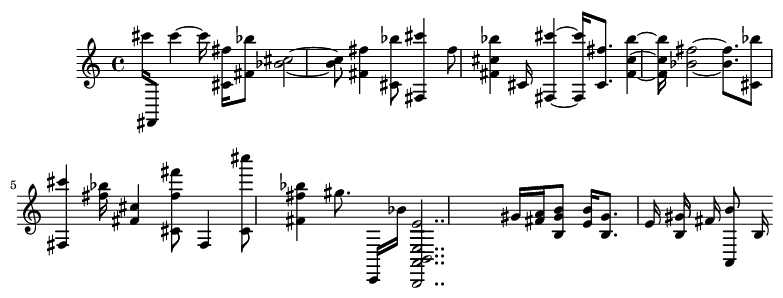

In [47]:
Image(filename=str(note_stream.write('lily.png')))

In [48]:
note_stream.show('midi')